Epoch 1/5
844/844 [==============================] - 40s 47ms/step - loss: 0.1738 - accuracy: 0.9466 - val_loss: 0.0572 - val_accuracy: 0.9843
Epoch 2/5
844/844 [==============================] - 41s 48ms/step - loss: 0.0529 - accuracy: 0.9841 - val_loss: 0.0446 - val_accuracy: 0.9873
Epoch 3/5
844/844 [==============================] - 39s 46ms/step - loss: 0.0359 - accuracy: 0.9889 - val_loss: 0.0402 - val_accuracy: 0.9897
Epoch 4/5
844/844 [==============================] - 39s 46ms/step - loss: 0.0268 - accuracy: 0.9916 - val_loss: 0.0399 - val_accuracy: 0.9885
Epoch 5/5
313/313 [==============================] - 2s 8ms/step - loss: 0.0271 - accuracy: 0.9908
Test accuracy: 0.9908000230789185
1/1 [==============================] - 0s 74ms/step


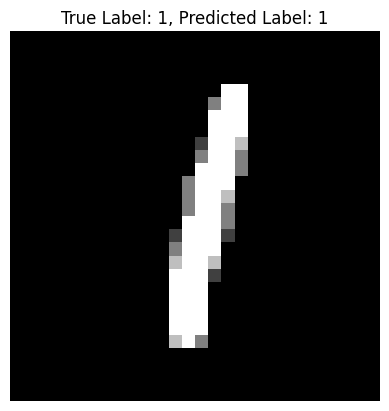

In [4]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

# Normalize the pixel values to the range [0, 1]
X_train = X_train / 255.0
X_test = X_test / 255.0

# Reshape the input data to have a single channel
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# Define the model architecture
model = keras.models.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

# Choose a random test image
index = np.random.randint(0, len(X_test))
test_image = X_test[index]
true_label = y_test[index]

# Make a prediction
prediction = np.argmax(model.predict(test_image.reshape(1, 28, 28, 1)))

# Display the image and prediction
plt.imshow(test_image.squeeze(), cmap='gray')
plt.title(f"True Label: {true_label}, Predicted Label: {prediction}")
plt.axis('off')
plt.show()